In [51]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [52]:
from ema_workbench import (Model, MultiprocessingEvaluator, 
                           Policy, Scenario, ema_logging,
                           save_results, load_results, 
                           SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties

import time
from problem_formulation import get_model_for_problem_formulation

# sns pair_plots create a lot of warnings
import warnings
warnings.filterwarnings('ignore')


ema_logging.log_to_stderr(ema_logging.INFO)

# for Open exploration we choose problem formulation
dike_model, planning_steps = get_model_for_problem_formulation(3)

In [53]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), 
# lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [54]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [10]:
# running the model through EMA workbench

with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=50, policies=10)
# observing the simulation runs
experiments, outcomes = results

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 50 scenarios * 10 policies * 1 model(s) = 500 experiments
100%|████████████████████████████████████████| 500/500 [04:01<00:00,  2.07it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [11]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,42,56.170062,1.0,0.340180,310.873557,1.0,0.105543,252.457180,10.0,0.257675,...,2,7,5,8,3,9,0,670,660,dikesnet
1,16,159.960368,1.5,0.015644,115.553727,1.5,0.920948,258.639499,1.5,0.779064,...,2,7,5,8,3,9,0,671,660,dikesnet
2,100,167.884555,1.5,0.078617,326.621087,10.0,0.160875,200.042142,10.0,0.701017,...,2,7,5,8,3,9,0,672,660,dikesnet
3,44,324.965155,1.5,0.773752,294.351875,1.0,0.155090,91.548423,10.0,0.883048,...,2,7,5,8,3,9,0,673,660,dikesnet
4,125,36.746434,1.0,0.207452,177.264955,1.5,0.300196,239.227147,1.5,0.850474,...,2,7,5,8,3,9,0,674,660,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,63,217.544030,1.0,0.263660,131.364071,1.0,0.741571,139.972943,10.0,0.516436,...,7,7,1,0,5,1,4,715,669,dikesnet
496,20,81.272034,1.5,0.676908,141.994490,1.5,0.860015,74.894534,1.5,0.463148,...,7,7,1,0,5,1,4,716,669,dikesnet
497,15,347.257385,1.0,0.029888,260.092934,1.0,0.560123,265.186172,1.0,0.399788,...,7,7,1,0,5,1,4,717,669,dikesnet
498,64,197.120214,1.5,0.789333,349.308848,10.0,0.463713,177.603640,1.5,0.584900,...,7,7,1,0,5,1,4,718,669,dikesnet


In [12]:
outcomes

{'A.1 Total Costs': array([1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.50937401e+08, 1.50937401e+08,
        1.50937401e+08, 1.50937401e+08, 1.47485484e+08, 7.66818026e+08,
        1.47485484e+08, 1.47485484e+08, 1.474

In [23]:
print(outcomes.keys())

dict_keys(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs', 'A.2_Expected Number of Deaths', 'A.3 Total Costs', 'A.3_Expected Number of Deaths', 'A.4 Total Costs', 'A.4_Expected Number of Deaths', 'A.5 Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])


In [14]:
# create a dataframe from the outcomes with an extra column with policy names
policies = experiments['policy']
data = pd.DataFrame(outcomes)
data['policy'] = policies

In [19]:
# add columns to the dataframe in which total outcomes are defined for total costs and number of deaths

data['total costs'] = data['A.1 Total Costs'] + \
                                      data['A.2 Total Costs'] + \
                                      data['A.3 Total Costs'] + \
                                      data['A.4 Total Costs'] + \
                                      data['A.5 Total Costs']

data['total Expected Number of Deaths'] = data['A.1_Expected Number of Deaths'] + \
                                          data['A.2_Expected Number of Deaths'] + \
                                          data['A.3_Expected Number of Deaths'] + \
                                          data['A.4_Expected Number of Deaths'] + \
                                          data['A.5_Expected Number of Deaths']

In [24]:
#create an outcomes dataframe with only the relevant outcomes for A3
A_1data = data[['A.1 Total Costs',
                'A.1_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_2data = data[['A.2 Total Costs', 
                'A.2_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_3data = data[['A.3 Total Costs',
                'A.3_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_4data = data[['A.4 Total Costs',
                'A.4_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_5data = data[['A.5 Total Costs',
                'A.5_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_totaldata=data[['total costs', 
                  'total Expected Number of Deaths', 'RfR Total Costs',
                  'Expected Evacuation Costs', "policy"]]

In [25]:
data.columns

Index(['A.1 Total Costs', 'A.1_Expected Number of Deaths', 'A.2 Total Costs',
       'A.2_Expected Number of Deaths', 'A.3 Total Costs',
       'A.3_Expected Number of Deaths', 'A.4 Total Costs',
       'A.4_Expected Number of Deaths', 'A.5 Total Costs',
       'A.5_Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs', 'policy',
       'total Expected Number of Deaths', 'total costs'],
      dtype='object')

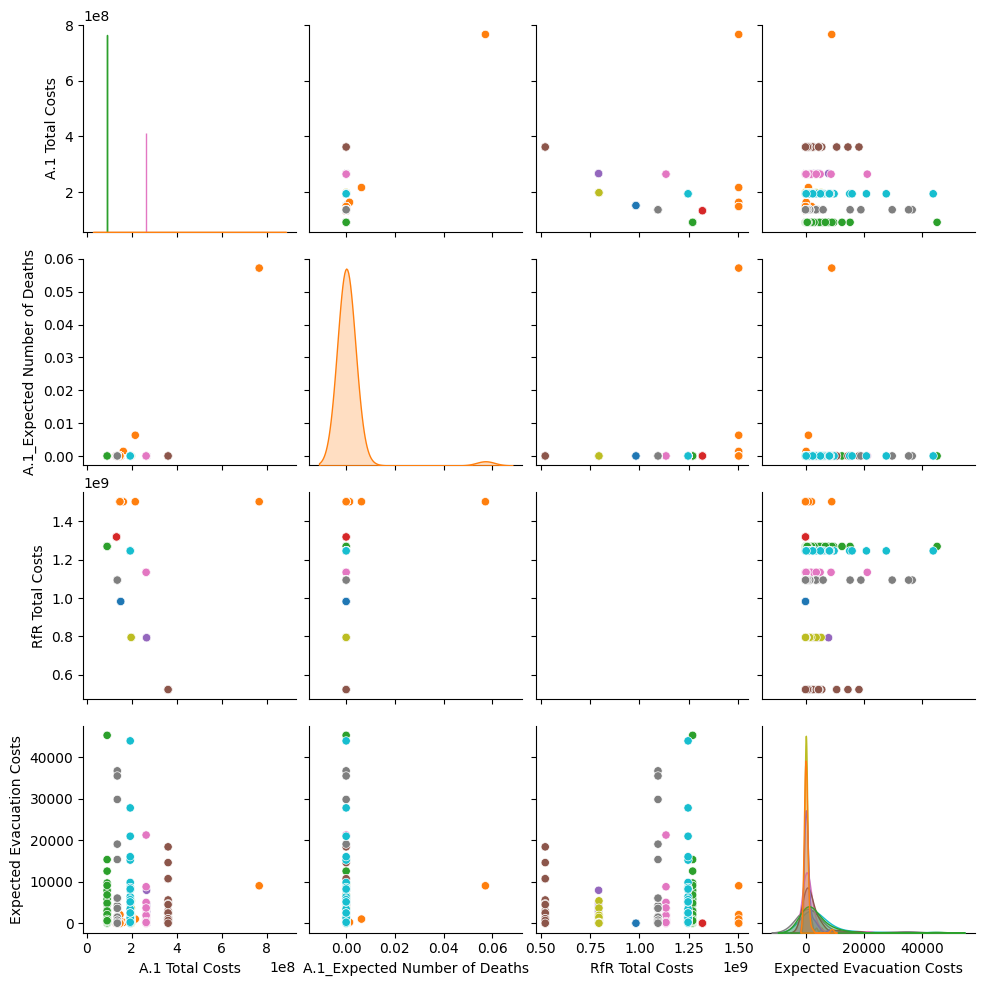

In [29]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A1pairplot=sns.pairplot(A_1data, 
                        hue='policy', 
                        vars=['A.1 Total Costs', 
                              'A.1_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A1pairplot._legend.remove()
A1pairplot.savefig("Figures/A1pairplot.png")

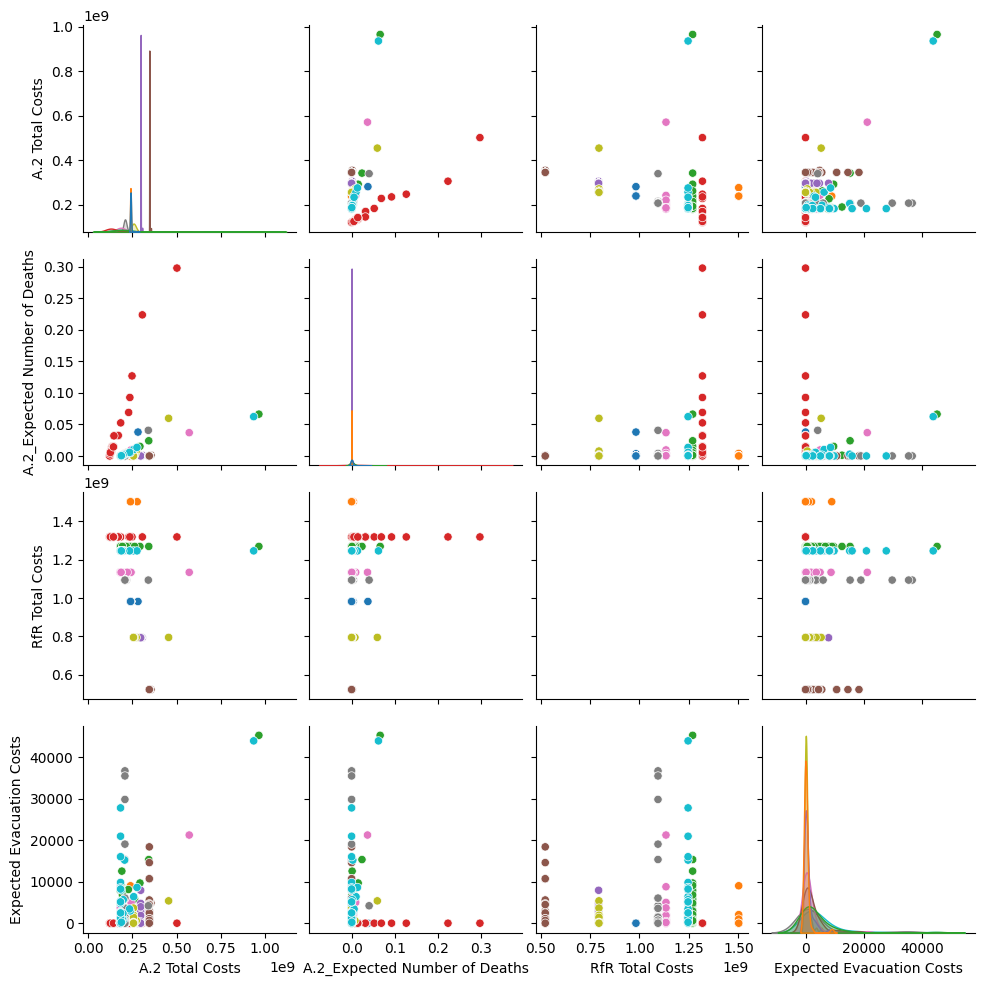

In [30]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A2pairplot=sns.pairplot(A_2data, 
                        hue='policy', 
                        vars=['A.2 Total Costs', 
                              'A.2_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A2pairplot._legend.remove()
A2pairplot.savefig("Figures/A2pairplot.png")

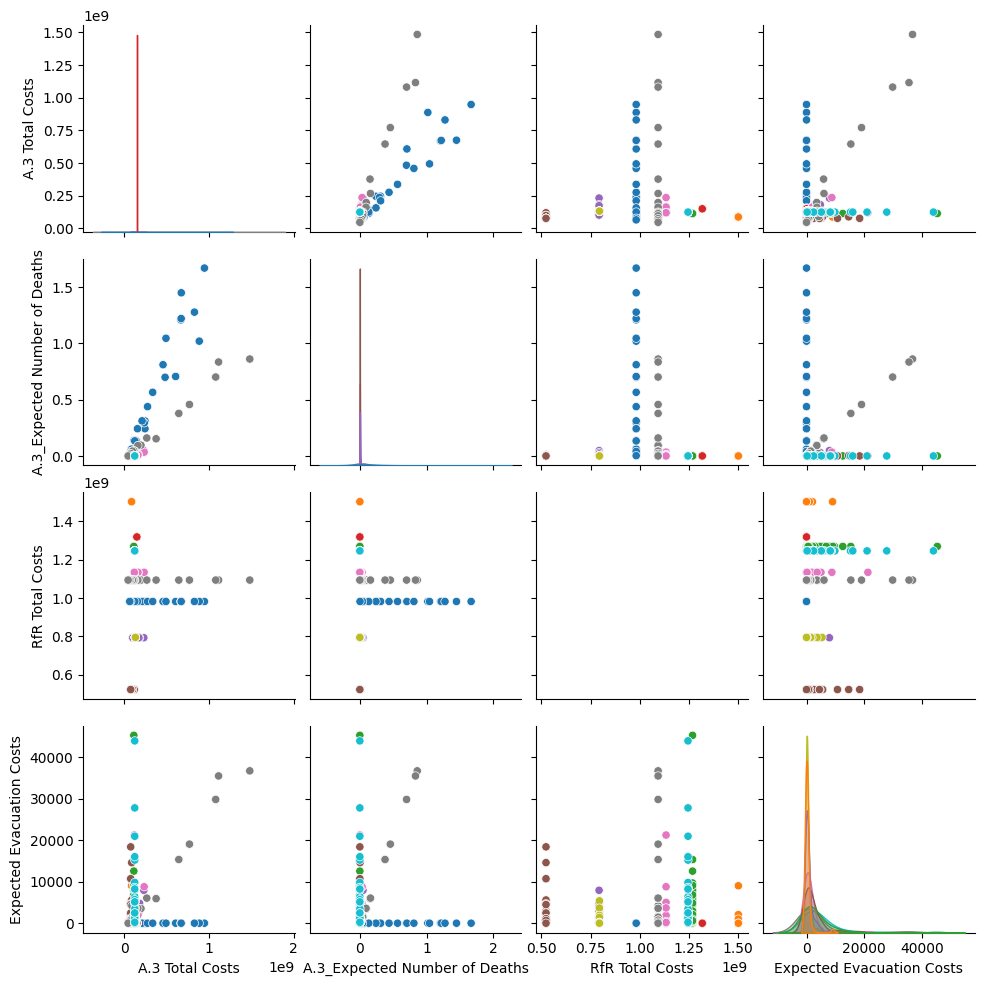

In [31]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A3pairplot=sns.pairplot(A_3data, 
                        hue='policy', 
                        vars=['A.3 Total Costs', 
                              'A.3_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A3pairplot._legend.remove()
A3pairplot.savefig("Figures/A3pairplot.png")

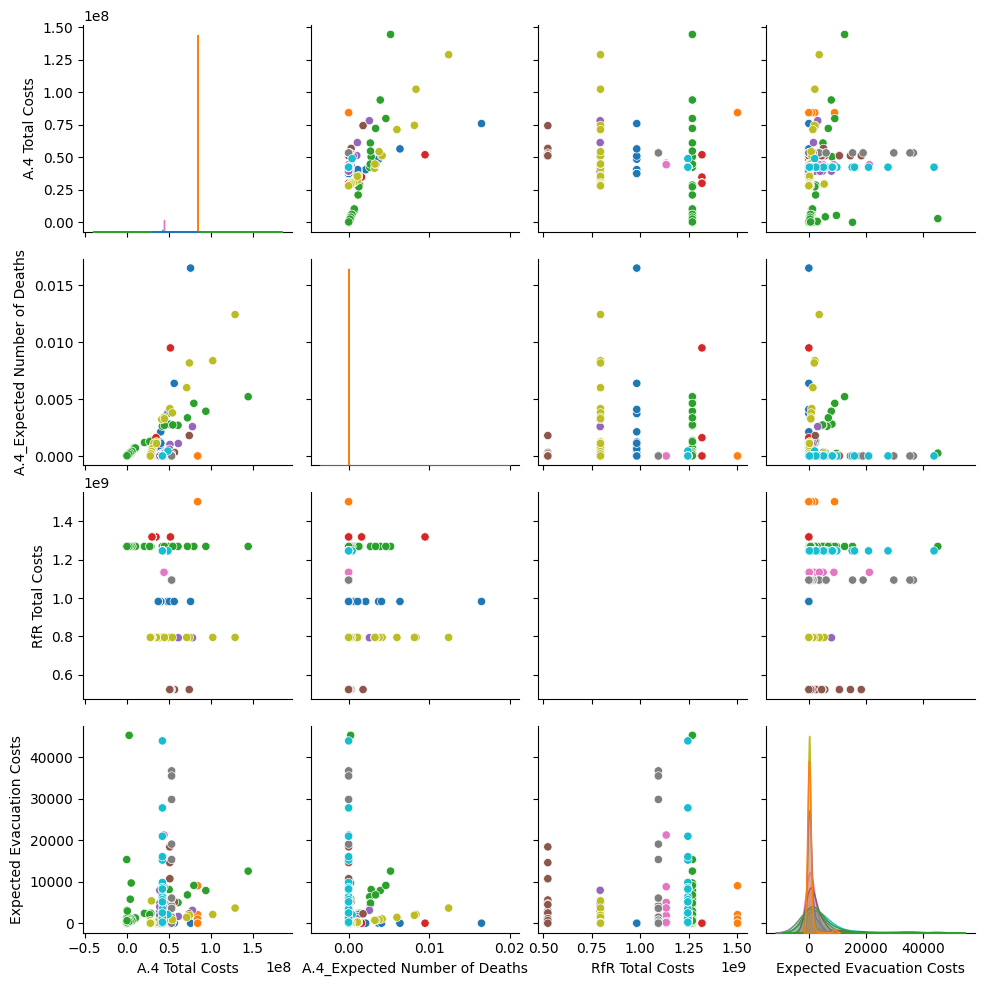

In [32]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A4pairplot=sns.pairplot(A_4data, 
                        hue='policy', 
                        vars=['A.4 Total Costs', 
                              'A.4_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A4pairplot._legend.remove()
A4pairplot.savefig("Figures/A4pairplot.png")

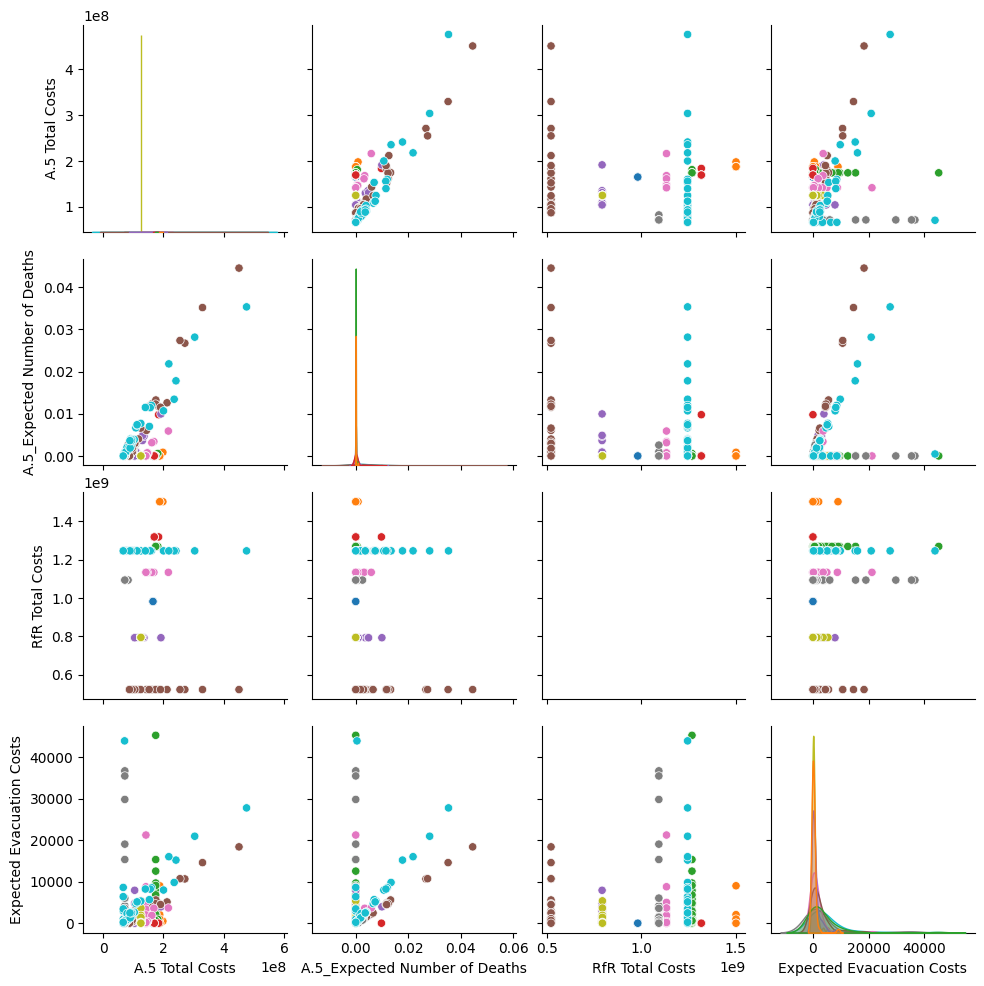

In [33]:
# a pairplot is created to be able to have a first glance at the objectives 
# and possible trade-offs
A5pairplot=sns.pairplot(A_5data, 
                        hue='policy', 
                        vars=['A.5 Total Costs', 
                              'A.5_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A5pairplot._legend.remove()
A5pairplot.savefig("Figures/A5pairplot.png")

!!! Dit moet aangepast worden!!!!!! 
Various correlations between outcomes are present.

For all dike rings: the expected annual damage and the expected number of deaths at a specific dike ring are positively correlated. The correlation coefficient that governs the mathematical connection seems again to be correlated with the specific policy that is in place.
For all dike rings: the expected annual damage at a specific dike ring and the total expected evacuation costs are positively correlated in a relatively large fraction of the cases. They are also never negatively correlated.
For all dike rings: the expected number of deaths at a specific dike ring and the total expected evacuation costs are positively correlated in a relatively large fraction of the cases. They are also never negatively correlated.
The ranges of dike ring specific levers and outcomes differ significantly.

The highest expected annual damage per dike ring can be ordered as follows: [A1,A3,A2,A5,A4], from highest to lowest.
The most expected number of deaths per dike ring can be ordered as follows: [A3,A1,A2,A5,A4], from highest to lowest.
The highest dike investment costs per dike ring can be ordered as follows: [A2,A1,A3,A5,A4], from highest to lowest.
The policy options differ significantly in their effectiveness.

For all dike rings: the more is invested in dikes at a specific dike ring, the less number of deaths are expected at that specific dike ring and the less annual damage can be expected at that same dike ring.
Only for dike ring A3: the more is invested in dikes, the less total evacuation cost is expected.
For all dike rings: spending more on RFR measures does not unambiguously lead to less expected number of deaths, less expected annual damage or less expected evacuation costs.
PRIM Scenario Discovery
For the prim analyses boundaries have to be set on the outcomes of interest. To determine which boundary to pick, kde plots are made.


-------------------------------------------------------------------------------------------------------------

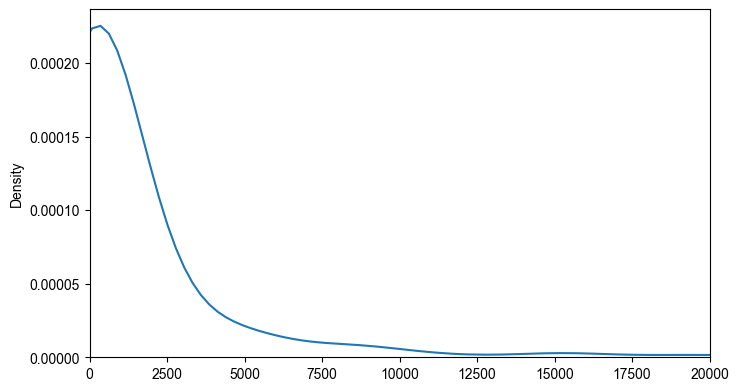

In [34]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['Expected Evacuation Costs'], ax=ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 20000])
fig.subplots_adjust(bottom=0.3)
plt.show()

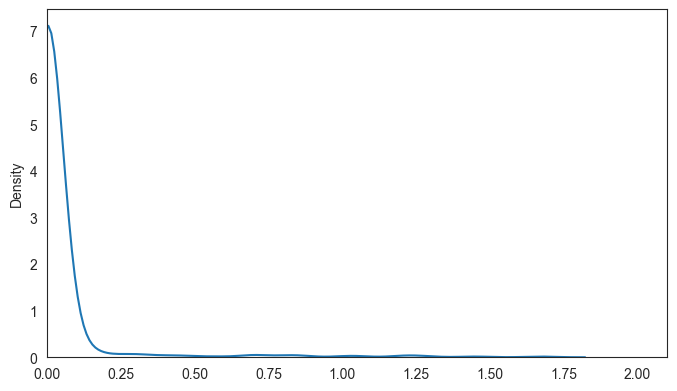

In [37]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['A.3_Expected Number of Deaths'], ax=ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 2.1])
fig.subplots_adjust(bottom=0.3)
plt.show()

In [38]:
ydeaths = outcomes['A.3_Expected Number of Deaths'] < 1e-5
np.sum(ydeaths)/len(outcomes['A.3_Expected Number of Deaths'])

0.744

In [ ]:
#ycosts=outcomes['A.3 Total Costs'] < 1e6
#np.sum(ydamage)/len(outcomes['A.3_Expected Annual Damage'])

In [39]:
yevac=outcomes['Expected Evacuation Costs'] < 1e3
np.sum(yevac)/len(outcomes['Expected Evacuation Costs'])

0.742

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 500 points remaining, containing 372 cases of interest
[MainProcess/INFO] mean: 0.9, mass: 0.16, coverage: 0.1935483870967742, density: 0.9 restricted_dimensions: 6


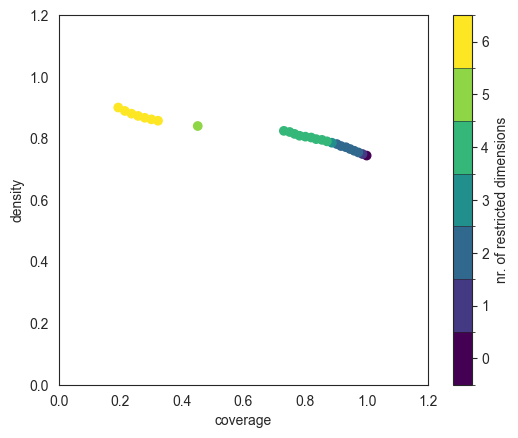

In [40]:
from ema_workbench.analysis import prim
x1 = experiments.drop([o.name for o in dike_model.levers] + ["policy"], axis=1)

prim_alg = prim.Prim(x1, ydeaths, threshold=0.5, peel_alpha=0.01)
boxbestdeaths = prim_alg.find_box()

boxbestdeaths.show_tradeoff()
plt.show()

In [41]:
boxbestdeaths.peeling_trajectory[35:60]

,coverage,density,id,mass,mean,res_dim


In [ ]:
print(results)


(     A.0_ID flood wave shape    A.1_Bmax A.1_Brate  A.1_pfail    A.2_Bmax   
0                         95  331.199024       1.5   0.864960   40.081024  \
1                         32   72.128441       1.0   0.703143   52.830466   
2                         50  149.973166       1.5   0.897023  171.651399   
3                         60  260.834140       1.5   0.876785  138.559110   
4                        101  226.026700       1.0   0.139517   80.367672   
..                       ...         ...       ...        ...         ...   
295                       86  285.245298       1.0   0.021050  103.400269   
296                       42  108.173371      10.0   0.211243  151.623453   
297                       38   68.477767       1.5   0.112230  303.693850   
298                      126  254.275742       1.5   0.839688  258.955042   
299                        6  315.001079       1.0   0.050605  105.255251   

    A.2_Brate  A.2_pfail    A.3_Bmax A.3_Brate  A.3_pfail  ...   
0       

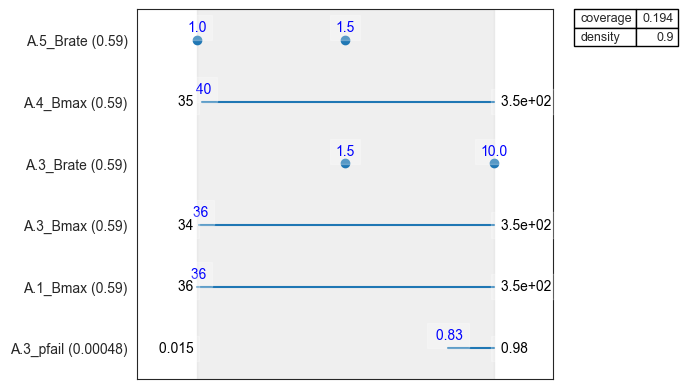

In [50]:
bestdeaths=boxbestdeaths.inspect(style='graph')

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 500 points remaining, containing 371 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.14, coverage: 0.18867924528301888, density: 1.0 restricted_dimensions: 10


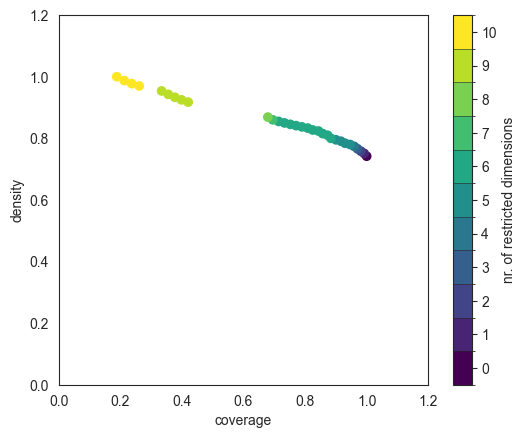

In [45]:
prim_alg = prim.Prim(x1, yevac, threshold=0.5, peel_alpha=0.01)
boxbestevac= prim_alg.find_box()

boxbestevac.show_tradeoff()
plt.show()

In [46]:
boxbestevac.peeling_trajectory[60:80]

,coverage,density,id,mass,mean,res_dim


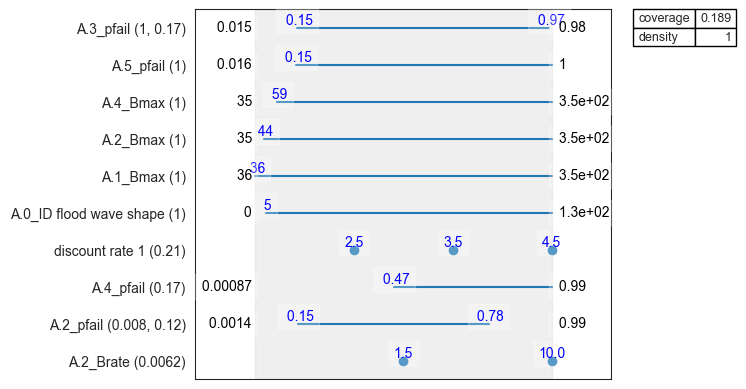

In [49]:
bestevac=boxbestevac.inspect(style='graph')